In [1]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt

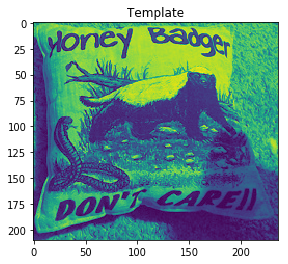

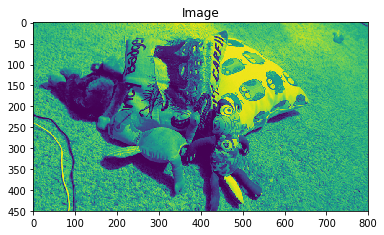

In [3]:
# Images being used
template = cv2.imread('feature-matching-template.jpg',0)
plt.imshow(template)
plt.title('Template')
plt.show()

image = cv2.imread('feature-matching-image.jpg',0)
plt.imshow(image)
plt.title('Image')
plt.show()

In [6]:
## Task1: Detect the key points and extract descriptors using any feature detector and descriptor.

sift = cv2.xfeatures2d.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(template, None)
keypoints2, descriptors2 = sift.detectAndCompute(image, None)

template_keypoints = cv2.drawKeypoints(template, keypoints1, None)
image_keypoints = cv2.drawKeypoints(image, keypoints2, None)

cv2.imwrite('template_keypoints.jpg', template_keypoints)
cv2.imwrite('image_keypoints.jpg', image_keypoints)

plt.imshow(template_keypoints)
plt.title('Template Keypoints')
plt.show()

plt.imshow(image_keypoints)
plt.title('Image Keypoints')
plt.show()

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [4]:
## Task2: Matching descriptor vectors using any matching techniques.
minimum_matches = 10

parameterIndex = dict(algorithm = 0, trees = 5)
parameterSearch = dict(checks = 50)

matches = cv2.FlannBasedMatcher(parameterIndex, parameterSearch).knnMatch(descriptors1,descriptors2,k=2)

# ratio test to determine good matches
goodMatches = []
for a,b in matches:
    if a.distance < 0.7*b.distance:
        goodMatches.append(a)    

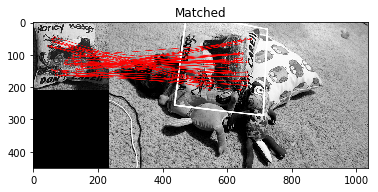

In [5]:
## Task3: Compute Homography and localize the object.
sourcePoints = np.float32([ keypoints1[a.queryIdx].pt for a in goodMatches ]).reshape(-1,1,2)
destinationPoints = np.float32([ keypoints2[a.trainIdx].pt for a in goodMatches ]).reshape(-1,1,2)
masksNum, mask = cv2.findHomography(sourcePoints, destinationPoints, cv2.RANSAC, 5.0)
maskMatched = mask.ravel().tolist()
height,weight = template.shape
points = np.float32([ [0,0],[0,height-1],[weight-1,height-1],[weight-1,0] ]).reshape(-1,1,2)
destination = cv2.perspectiveTransform(points,masksNum)
image = cv2.polylines(image,[np.int32(destination)],True,255,3, cv2.LINE_AA)

    
draw_params = dict(matchColor = (255,0,0), singlePointColor = None, matchesMask = maskMatched, flags = 2)
matchedImage = cv2.drawMatches(template,keypoints1,image,keypoints2,goodMatches,None,**draw_params)
plt.imshow(matchedImage, 'gray')
plt.title('Matched')
plt.show()
cv2.imwrite('Matched_Features.jpg', matchedImage)